In [1]:
from quadtree import *
from upwardPass import *
from downwardPass import *
import copy
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import math
def directSource(particles):
    #particles=particles.tolist()
    for i, particle in enumerate(particles):
        for source in particles[:i]+particles[i+1:]:
            
            kernel=np.log(complex(particle.x-source.x,particle.y-source.y))
            particle.u += source.q*kernel

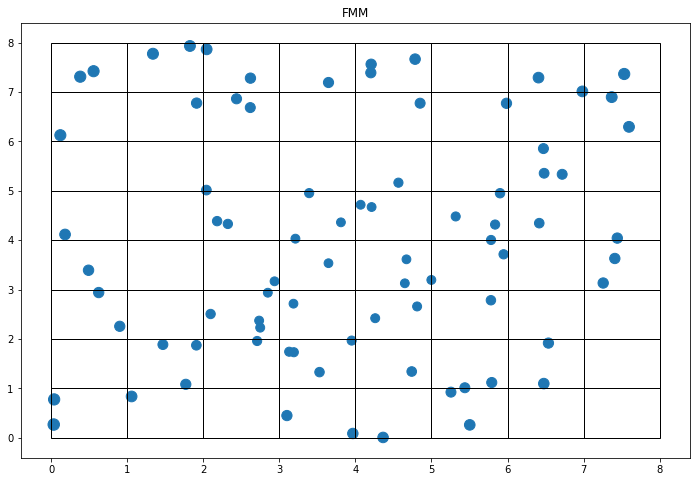

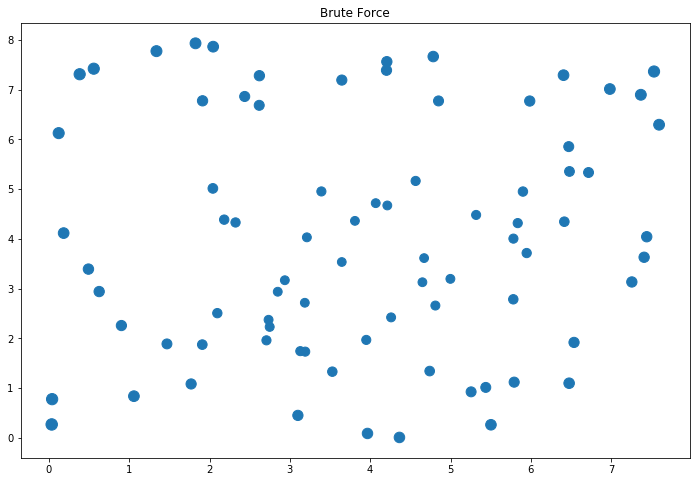

4.426546773830975e-15


In [2]:
n=80
m=8
P=10


particles=[Particle(random.uniform(0,m),random.uniform(0,m),1) for i in range(n)]
particlesCopy=copy.deepcopy(particles)
qt=QTree(3,particles,m)
outgoingExpansion(qt.root,P)
incomingExpansion(qt.root,P)
u = [point.u.real for point in particles]

qt.graph_potential()
directSource(particlesCopy) 
fig = plt.figure(figsize=(12, 8))
x1 = [point.x for point in particlesCopy]
y1 = [point.y for point in particlesCopy]

u1 = [point.u.real for point in particlesCopy]
plt.scatter(x1, y1,s=u1)
plt.title('Brute Force')
plt.show()

errorSum=0
baseSum=0
for i in range(n):
    if (u[i] != float("inf") and u[i] != float("-inf")):

        errorSum+=(u[i]-u1[i])**2
        baseSum+=u[1]**2
    else:
        continue


print(errorSum/baseSum)

# visualize and compare FMM and Brute Force

[22.629940548350522, 25.707276287032894, 22.53939046352717, 26.05215883197444, 25.149044482165404, 0, 26.912541752358692, 26.144458087778705]


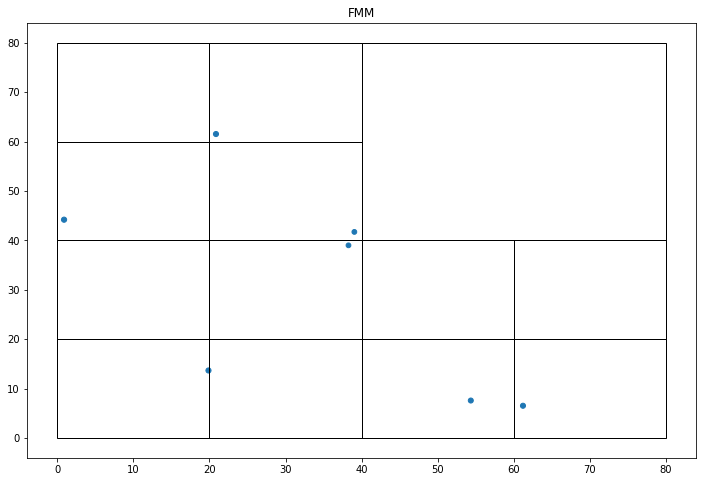

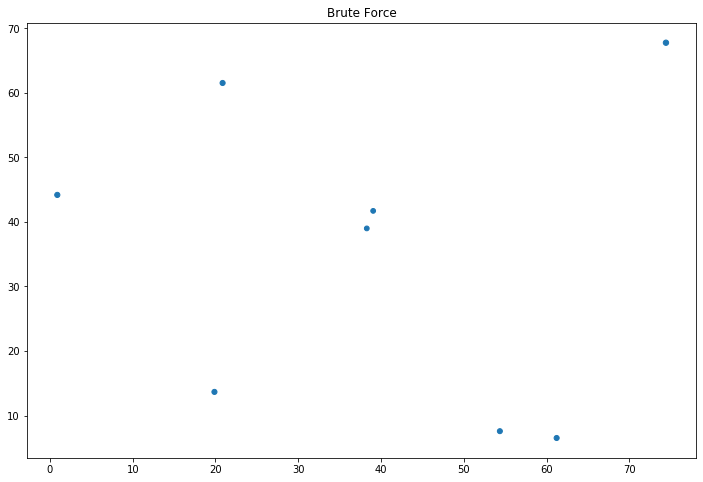

[39.044025577557065, 61.20533796183686, 38.272638323018626, 19.873386558190738, 54.348171724843326, 74.40808841232823, 0.8923447130340811, 20.858264358515797]
[41.70849131012682, 6.530376502801758, 38.993334629561346, 13.669628059588756, 7.588436938674539, 67.75391654961744, 44.18217350690438, 61.51785905431503]
[22.629940239180947, 25.70727709761856, 22.539391169193024, 26.05215858139904, 25.1490453350772, 28.577122316064724, 26.91254189225362, 26.14445810385968]
0.15446670060269643


In [4]:
n=8
m=80
P=10


particles=[Particle(random.uniform(0,m),random.uniform(0,m),1) for i in range(n)]
particlesCopy=copy.deepcopy(particles)
qt=AdapQTree(1,particles,m)
outgoingExpansion(qt.root,P)
incomingExpansion(qt.root,P)
u = [point.u.real for point in particles]
print(u)
qt.graph_potential()
directSource(particlesCopy) 
fig = plt.figure(figsize=(12, 8))
x1 = [point.x for point in particlesCopy]
y1 = [point.y for point in particlesCopy]

u1 = [point.u.real for point in particlesCopy]
plt.scatter(x1, y1,s=u1)
plt.title('Brute Force')
plt.show()
print(x1)
print(y1)
print(u1)
errorSum=0
baseSum=0
for i in range(n):
    if (u[i] != float("inf") and u[i] != float("-inf")):

        errorSum+=(u[i]-u1[i])**2
        baseSum+=u[1]**2
    else:
        continue


print(errorSum/baseSum)

In [10]:
def test_cutoff_term(n,m):
    particles=[Particle(random.uniform(0,m),random.uniform(0,m),1) for i in range(n)]
    particlesCopy=copy.deepcopy(particles)

    start_time = time.clock()
    directSource(particlesCopy)
    originalTime=time.clock() - start_time
    print(originalTime)
    u1 = [point.u.real for point in particlesCopy]
    errorList=[]
    FmmTimeList=[]

    for P in range(1,20):

        particlesCopy2=copy.deepcopy(particles)

        start_time = time.clock()
        qt=QTree(3,particlesCopy2,m)
        outgoingExpansion(qt.root,P)
        incomingExpansion(qt.root,P)
        FmmTimeList.append(time.clock() - start_time)

        #qt.graph_potential()

        x = [point.x for point in qt.points]
        y = [point.y for point in qt.points]

        u = [point.u.real for point in qt.points]



        #plt.scatter(x1, y1,s=1)
        #plt.show()
        errorSum=0
        baseSum=0
        for i in range(n):
            if (u[i] != float("inf") and u[i] != float("-inf")):

                errorSum+=(u[i]-u1[i])**2
                baseSum+=u[1]**2
            else:
                continue
        errorList.append(np.sqrt(errorSum/baseSum))

    print(errorList)
    plist=list(range(1,20))
    fig = plt.figure(figsize=(12, 12))
    plt.plot(plist, errorList)
    plt.yscale('log')
    plt.xlabel('cut off term P')
    plt.ylabel('error')
    plt.title('error vs cut off term')
    plt.show()

    print(FmmTimeList)
    glist=list(range(1,20))
    fig = plt.figure(figsize=(12, 12))
    #plt.plot(glist, FmmTimeList,glist,[originalTime]*9)
    plt.plot(glist, FmmTimeList)
    plt.yscale('log')
    plt.xlabel('cut off term P')
    plt.ylabel('running time')
    plt.title('running time vs cut off term')
    plt.show()
    

/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


1.6126450000000432
[0.01022735189444404, 0.0004364048438570671, 4.2503276084026805e-05, 1.4500262828406686e-05, 1.4899034414681153e-06, 2.8672131327296517e-07, 8.255200422245577e-08, 2.6988850117541392e-08, 8.048993925910931e-09, 2.5327394872215025e-09, 9.213833358653928e-10, 4.122530812641147e-10, 1.5965639094989543e-10, 5.2441648843759176e-11, 2.3319106968979846e-11, 9.333622344529293e-12, 3.358982632496235e-12, 1.4255817225966959e-12, 6.242544733041631e-13]


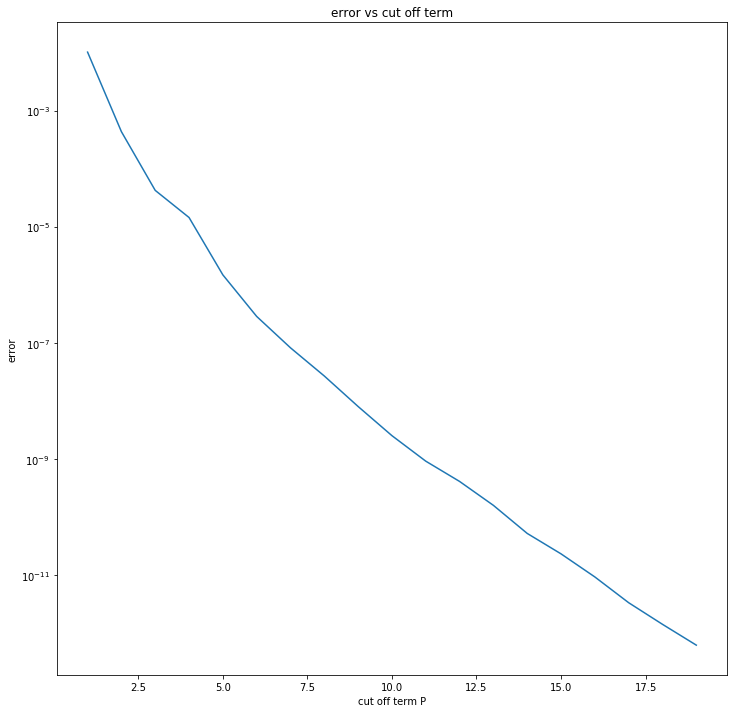

[0.2195260000000303, 0.22436599999997497, 0.23913600000003044, 0.3033320000000117, 0.26927100000000337, 0.30248000000000275, 0.3398650000000316, 0.3810940000000187, 0.4332399999999552, 0.5000689999999963, 0.5474230000000375, 0.6249820000000454, 0.7118469999999775, 0.8043289999999956, 0.8637300000000323, 0.9633930000000532, 1.0589390000000094, 1.1740669999999795, 1.2906219999999848]


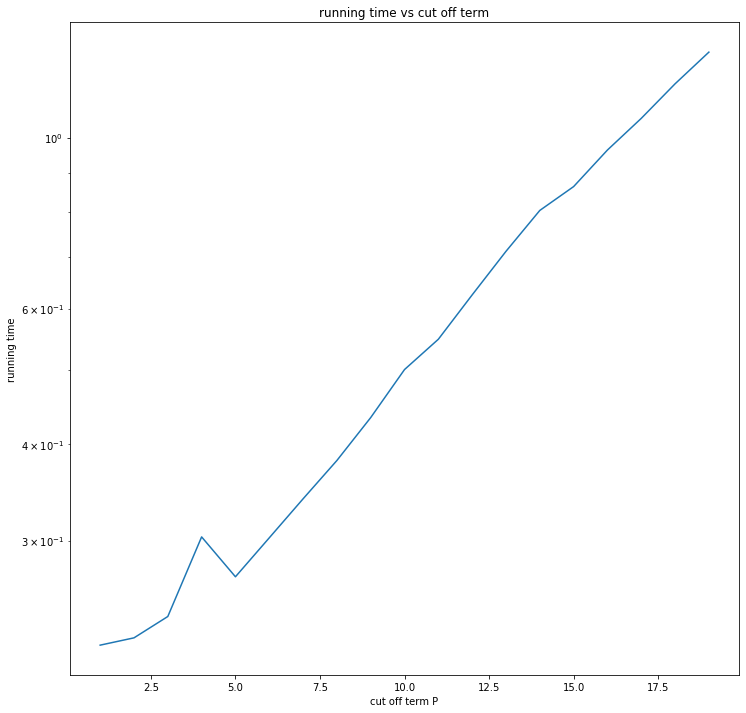

In [13]:
test_cutoff_term(1000,800)

In [2]:
def test_level(n,m):
    P=10
    FmmTimeList=[]
    #OrginalTimeList=[]
    errorList=[]
    
    particles=[Particle(random.uniform(0,m),random.uniform(0,m),1) for i in range(n)]
    particlesCopy=copy.deepcopy(particles)
    
    start_time = time.clock()
    directSource(particlesCopy)
    originalTime=time.clock() - start_time
    print(originalTime)
    
    #pig = plt.figure(figsize=(12, 8))
    #plt.title("Quadtree")
    
    #x1 = [point.x for point in particlesCopy]
    #y1 = [point.y for point in particlesCopy]
    
    u1 = [point.u.real for point in particlesCopy]
    
    #plt.scatter(x1, y1,s=1)
    #plt.show()
    
    
        
    for g in range(2,8):    
        particlesCopy2=copy.deepcopy(particles)
        start_time = time.clock()
        

        qt=QTree(g,particlesCopy2,m)
        outgoingExpansion(qt.root,P)
        incomingExpansion(qt.root,P)
        FmmTimeList.append(time.clock() - start_time)
        #print(time.clock() - start_time)
        
        #qt.graph_potential()
        
        #x = [point.x for point in qt.points]
        #y = [point.y for point in qt.points]
        
        u = [point.u.real for point in qt.points]
        
        
        errorSum=0
        data=0
        for i in range(n):
            if (u[i] != float("inf") and u[i] != float("-inf")):
                
                errorSum+=(u[i]-u1[i])**2
                data+=1
            else:
                continue
        
        
        errorList.append(np.sqrt(errorSum/data))
    
    #print(errorList)
    glist=list(range(2,8))
    fig = plt.figure(figsize=(12, 8))
    plt.plot(glist, errorList)
    plt.yscale('log')
    plt.xlabel('level L')
    plt.ylabel('error')
    plt.show()
    
    #print(FmmTimeList)
    glist=list(range(2,8))
    fig = plt.figure(figsize=(12, 8))
    plt.plot(glist, FmmTimeList,label='FMM')
    plt.plot(glist,[originalTime]*6,label='direct')
    plt.legend(loc="upper left")
    plt.xlabel('level L')
    plt.ylabel('running time')
    
    plt.show()

/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


1.0190880000000002


/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


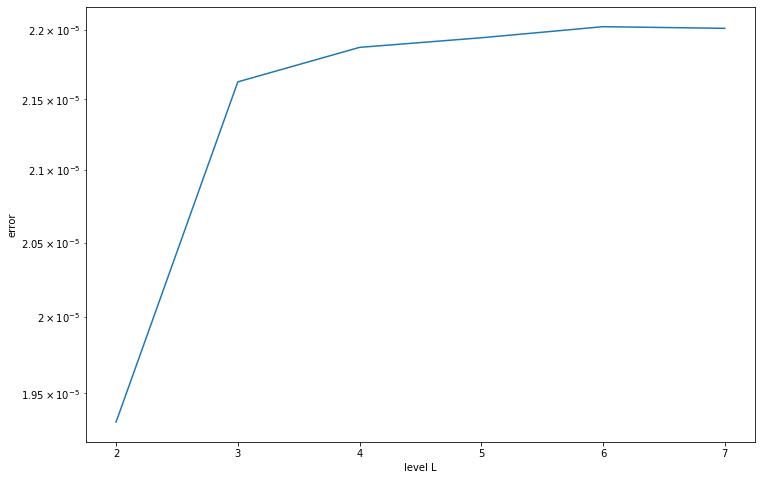

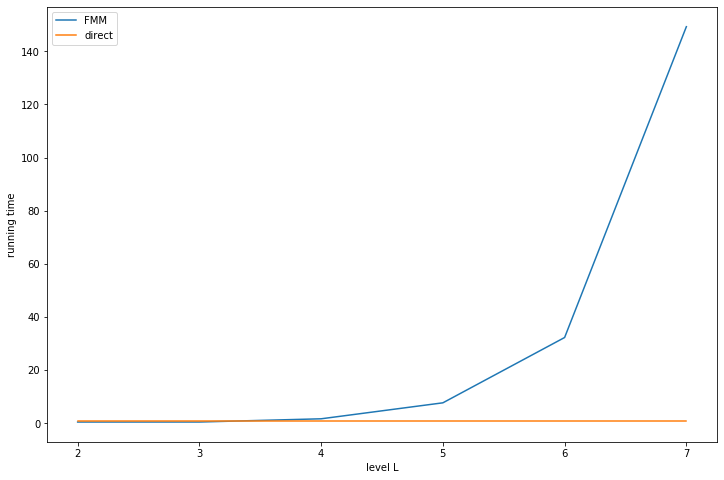

In [3]:
test_level(800,800)

In [4]:
test_level(8000,800)

/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: 

In [19]:
def test_fixed_number_per_box(d):
    
    
    P=10
    FmmTimeList=[]
    OriginalTimeList=[]
    errorList=[]
    m=800
    
    
    #pig = plt.figure(figsize=(12, 8))
    #plt.title("Quadtree")
    
    #x1 = [point.x for point in particlesCopy]
    #y1 = [point.y for point in particlesCopy]
    
    
    
    #plt.scatter(x1, y1,s=1)
    #plt.show()
    
    
        
    for g in range(2,8):
        n=(2**(2*g))*d
        print(n)
        #m=2**g
        #particles=[Particle(x,y,1) for x,y in np.random.randint(1,m,(n,2))]
        particles=[Particle(random.uniform(0,m),random.uniform(0,m),1) for i in range(n)]
        particlesCopy=copy.deepcopy(particles)
        
        start_time = time.clock()
        directSource(particlesCopy)
        OriginalTimeList.append(time.clock() - start_time)
        u1 = [point.u.real for point in particlesCopy]
        #print(u1)
        
        start_time = time.clock()
        qt=QTree(g,particles,m)
        outgoingExpansion(qt.root,P)
        incomingExpansion(qt.root,P)
        FmmTimeList.append(time.clock() - start_time)
        #print(time.clock() - start_time)
        
        
        #qt.graph_potential()
        
        #x = [point.x for point in qt.points]
        #y = [point.y for point in qt.points]
        
        u = [point.u.real for point in qt.points]
        #print(u)
        
        errorSum=0
        baseSum=0
        for i in range(n):
            if (u[i] != float("inf") and u[i] != float("-inf")):

                errorSum+=(u[i]-u1[i])**2
                baseSum+=u1[1]**2
                
            else:
                continue


    print(errorSum/baseSum)
    
    #print(errorList)
    glist=list(range(2,8))
    fig = plt.figure(figsize=(12, 8))
    plt.plot(glist, errorList)
    plt.yscale('log')
    plt.xlabel('level L')
    plt.ylabel('error')
    plt.show()
    
    #print(FmmTimeList)
    glist=list(range(2,8))
    fig = plt.figure(figsize=(12, 12))
    plt.plot(glist, FmmTimeList,label='FMM')
    plt.plot(glist,OriginalTimeList,label='direct')
    sizen=[(2**(2*g))/(2**(2*2)) for g in glist]
    nsquare=[OriginalTimeList[0]*s*s for s in sizen]
    nlogn=[OriginalTimeList[0]*s*np.log(s) for s in sizen]
    n=[OriginalTimeList[0]*s for s in sizen]
    plt.plot(glist,nsquare,'o',label='n^2')
    plt.plot(glist,nlogn,'o',label='nlogn')
    plt.plot(glist,n,'o',label='n')
    
    plt.legend(loc="upper left")
    plt.xlabel('level L')
    plt.ylabel('running time')
    plt.yscale('log')
    plt.show()

In [ ]:
test_fixed_number_per_box(10)

160
640


/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


2560
10240
40960
163840


In [5]:
n=80
m=80
P=10
time_1=[]
time_2=[]
time_3=[]
time_4=[]
time_5=[]
for n in [100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,6000,7000,8000]:
    particles=[Particle(random.uniform(0,m),random.uniform(0,m),1) for i in range(n)]
    particlesCopy=copy.deepcopy(particles)
    
    start_time = time.clock()
    qt=QTree(3,particles,m)
    end_time=time.clock()

    outgoingExpansion(qt.root,P)
    end_time1=time.clock()

    incomingExpansion(qt.root,P)
    end_time2=time.clock()
    
    time_1.append(end_time-start_time)
    time_2.append(end_time1-end_time)
    time_3.append(end_time2-end_time1)
    time_4.append(end_time2-start_time)
    
    start_time = time.clock()
    directSource(particlesCopy)
    time_5.append(time.clock() - start_time)

/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/yuesun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/

In [101]:
time_1

[0.0015700000003562309,
 0.002581000000645872,
 0.007384000000456581,
 0.007157000000006519,
 0.00908500000150525,
 0.011515000000144937,
 0.013648999998622457,
 0.01683000000048196,
 0.018724999999903957,
 0.023123999999370426,
 0.023258999999598018,
 0.027650999998513726,
 0.03368899999986752,
 0.03692099999898346]

In [6]:
nlist=[100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,6000,7000,8000]

Text(0.5, 1.0, 'Built Tree')

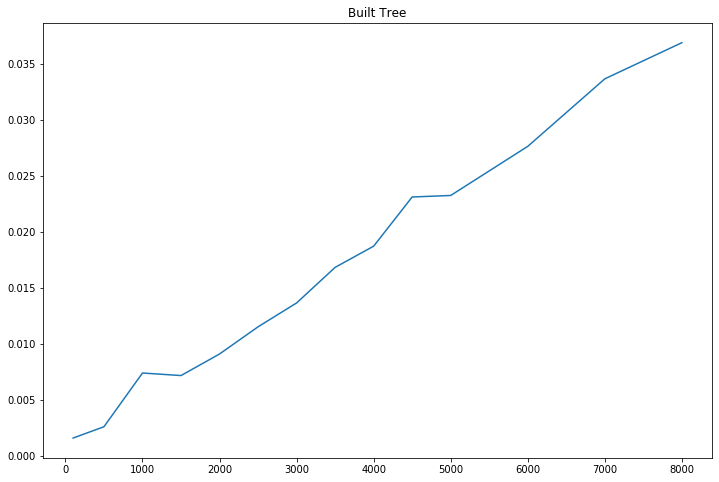

In [103]:
fig = plt.figure(figsize=(12, 8))
plt.plot(nlist, time_1,label='Built Tree')
plt.title('Built Tree')

Text(0.5, 1.0, 'Downward')

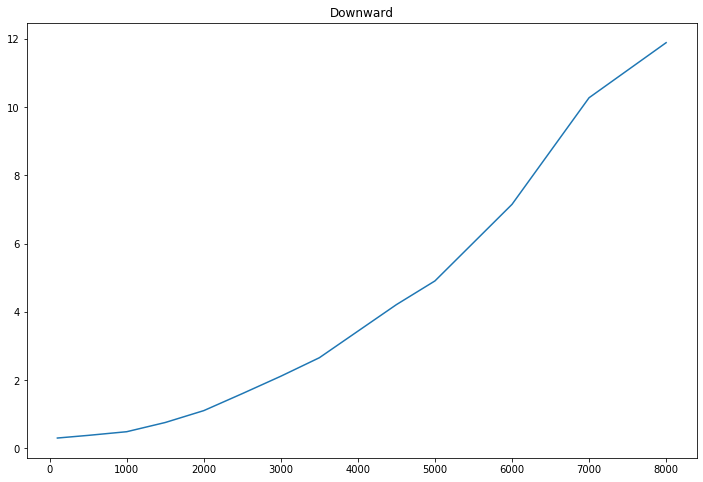

In [104]:
fig = plt.figure(figsize=(12, 8))
plt.plot(nlist, time_3,label='Downward')
plt.title('Downward')

Text(0.5, 1.0, 'Upward')

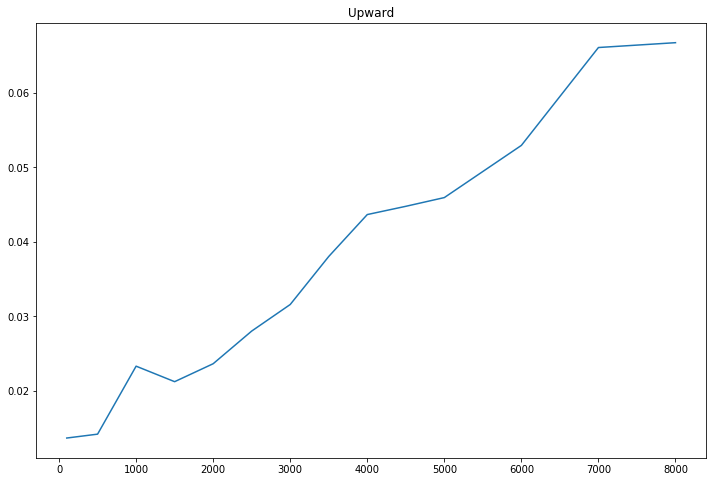

In [105]:
fig = plt.figure(figsize=(12, 8))
plt.plot(nlist, time_2,label='Upward')
plt.title('Upward')

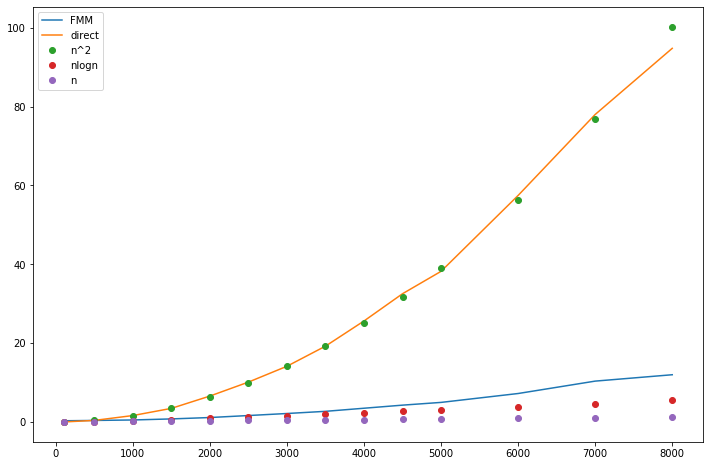

In [110]:
fig = plt.figure(figsize=(12, 8))
plt.plot(nlist, time_4,label='FMM')
plt.plot(nlist,time_5,label='direct')
sizen=[n/nlist[0] for n in nlist]
nsquare=[time_5[0]*s*s for s in sizen]
nlogn=[time_5[0]*s*np.log(s) for s in sizen]
n=[time_5[0]*s for s in sizen]
plt.plot(nlist,nsquare,'o',label='n^2')
plt.plot(nlist,nlogn,'o',label='nlogn')
plt.plot(nlist,n,'o',label='n')
plt.legend(loc="upper left")

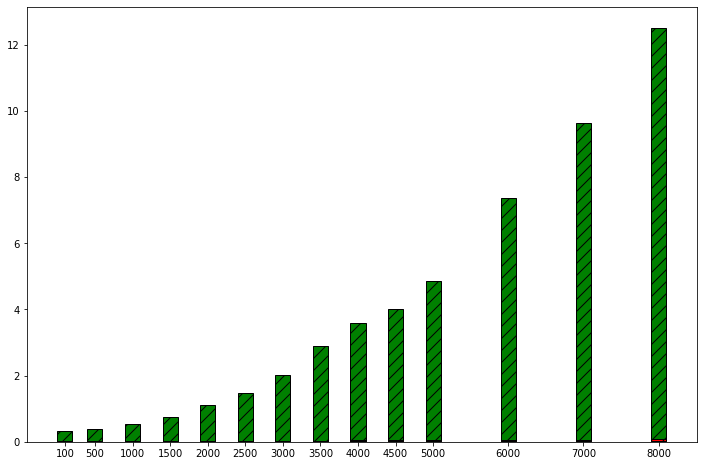

In [93]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.bar(nlist, time_1, width=200,color='blue', edgecolor='black', hatch='//')
ax.bar(nlist, time_2, width=200,bottom=time_1,color='red', edgecolor='black', hatch='//')
ax.bar(nlist, time_3, width=200,bottom=time_2,color='green', edgecolor='black', hatch='//')

ax.set_xticks(nlist)
